### Simple queuing theory simulation, M/M/1 queue  
Single server, single queue

Adapted from notes by Sara Billey at U. Washington

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def customer_response(time_guarantee):
    """
    Computes the average number of arrivals per minute given the time guarantee.
    Currently a placeholder returning a fixed value.

    Input: time_guarantee, If exceeded, no charge for the food
    Output: the average number of arrivals per minute given the time guarantee

    """
    return 1  # Placeholder value

In [4]:
def compute_profit(time_guarantee, total_time, profit_margin):
    """
    Computes profit (normalized by cost) per minute.
    """
    profit = 0
    for time in total_time:
        if time < time_guarantee:
            profit += profit_margin  # Making a profit
        else:
            profit -= 1  # Giving out free food
    return profit

In [5]:
def queuing_simulation(a, b, ncust):
    """
    Simulates an M/M/1 queue.

    Inputs:
       a: average number of arrivals per minute
       b: average number of people served per minute (reduce from 1.5 to 1.1 or 0.95)
       ncust: number of customers to simulate
    Outputs:
       at = arrival time of a person joining the queue
       st = service time once they reach the front
       ft = finish time after waiting and being served.
    """
    # Generate random inter-arrival times assuming a Poisson process
    iat = -1 / a * np.log(np.random.rand(ncust))
    at = np.cumsum(iat)  # Arrival times

    # Generate random service times assuming an exponential distribution
    st = -1 / b * np.log(np.random.rand(ncust))

    # Compute finish times
    ft = np.zeros(ncust)
    ft[0] = at[0] + st[0]  # First customer's finish time

    # compute finish time for each customer as the larger of
    # arrival time plus service time (if no wait)
    # finish time of previous customer plus service time (if wait)
    for i in range(1, ncust):
        ft[i] = max(at[i] + st[i], ft[i - 1] + st[i])

    return at, ft, st

Notation:

`at` = arrival time of a person joining the queue

`st` = service time once they reach the front

`ft` = finish time after waiting and being served

In [12]:

a = 1  # Average number of arrivals per minute
b = 1.2  # Average number of people served per minute
ncust = 10000  # Number of customers

profit_margin = 0.2  # (price - cost) / cost
time_guarantee = 20  # Guaranteed time

# Compute the average number of arrivals per minute given the time guarantee
a = customer_response(time_guarantee)

# Run the queuing simulation
at, ft, st = queuing_simulation(a, b, ncust)

# Total time spent by each customer
total_time = ft - at
wait_time = total_time - st # time spent waiting before being served

# Compute total profit (normalized by cost)
profit = compute_profit(time_guarantee, total_time, profit_margin)

# Compute profit per minute
profit_per_minute = profit / ft[-1]
print(f"Profit per minute: {profit_per_minute}")
ave_service_time = np.sum(st)/np.float32(ncust)
ave_wait_time = np.sum(wait_time)/np.float32(ncust)
ave_total_time = np.sum(total_time)/np.float32(ncust)
print('ave_service_time = ', ave_service_time)
print('ave_wait_time = ', ave_wait_time)
print('ave_total_time = ', ave_total_time)



Profit per minute: 0.16906406383232506
ave_service_time =  0.8358382532847165
ave_wait_time =  4.413701050146176
ave_total_time =  5.249539303430892


In [10]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

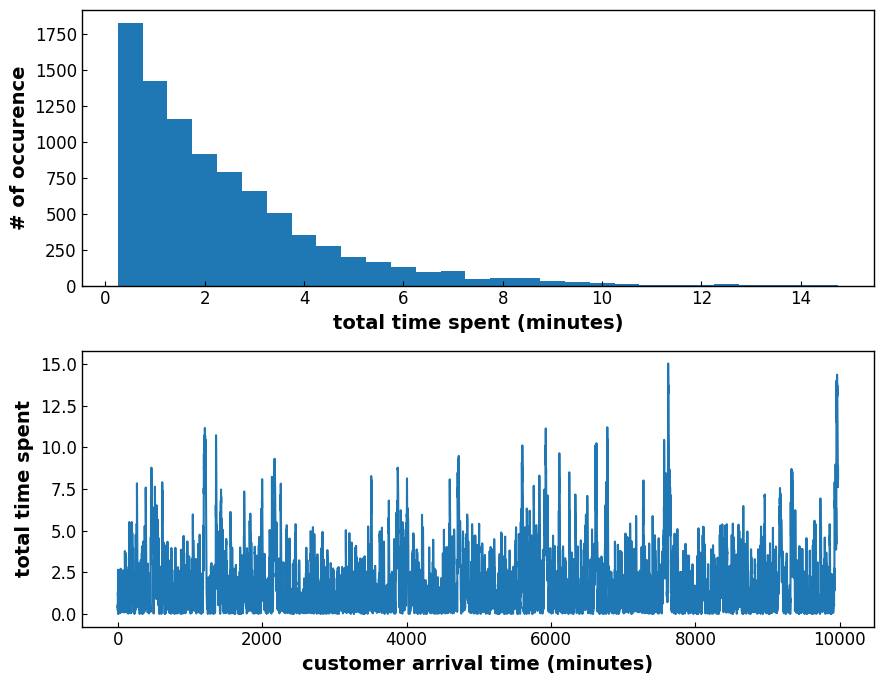

In [11]:
# Compare simulation to Poisson distribution 
fig, axs = plt.subplots(2,1,figsize=(9,7), tight_layout=True)

# Plot histogram of waiting times
axs[0].hist(total_time, bins=np.arange(0.25, np.floor(np.max(total_time))+0.25, 0.5))
axs[0].set(ylabel = '# of occurence')
axs[0].set(xlabel = 'total time spent (minutes)')

# Plot total time
axs[1].plot(at, total_time)
axs[1].set(xlabel = 'customer arrival time (minutes)')
axs[1].set(ylabel = 'total time spent')

plt.show()